In [1]:
%load_ext autoreload
%autoreload 2

import iris
import numpy as np
from matplotlib import pyplot as plt
import iris.quickplot as qplt
from PyCO2SYS import CO2SYS
import PyCO2SYS as pyco2
#https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/
# from PyCO2SYS.api import CO2SYS_wrap as co2sys
import iris.coord_categorisation
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import iris.plot as iplt
from tqdm import tqdm
import math

Pa_to_uatm = ((1.0/0.9869e-1))


In [28]:
# list(CO2dict1)

In [189]:
size = 5000
linear_alk = np.linspace(2000,2600,size)
repetitions = size
input_alk = np.transpose(np.tile(linear_alk, (repetitions, 1)))

linear_dic = np.linspace(1800,2400,size)
repetitions = size
input_dic = np.tile(linear_dic, (repetitions, 1))

# plt.pcolormesh(input_dic)
# plt.colorbar()

In [190]:

# Do the calculation. See CO2SYS's help for syntax and output format
# https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/#arguments
par1type = 1  # The first parameter supplied is of type "1", which is "alkalinity"
par2type = 2  # The first parameter supplied is of type "2", which is "DIC"
sal_in = 35.0
temp_in = 10.0
temp_out = temp_in
pres_in = 0.0
pres_out = pres_in
sil = 0.0  # Concentration of silicate  in the sample (in umol/kg)
po4 = 0.0  # Concentration of phosphate in the sample (in umol/kg)
pHscale = 1  # pH scale at which the input pH is reported ("1" means "Total Scale")  - doesn't matter in this example
k1k2c = 4  # Choice of H2CO3 and HCO3- dissociation constants K1 and K2 ("4" means "Mehrbach refit")
kso4c = 1

carbchem_out = CO2SYS(input_alk,input_dic,par1type,par2type,sal_in,temp_in,temp_out,pres_in,pres_out,sil,po4,pHscale,k1k2c,kso4c)


DIC taken up = -5.317063412682728
DIC taken up as % of dilution change = -5.0209679247423304


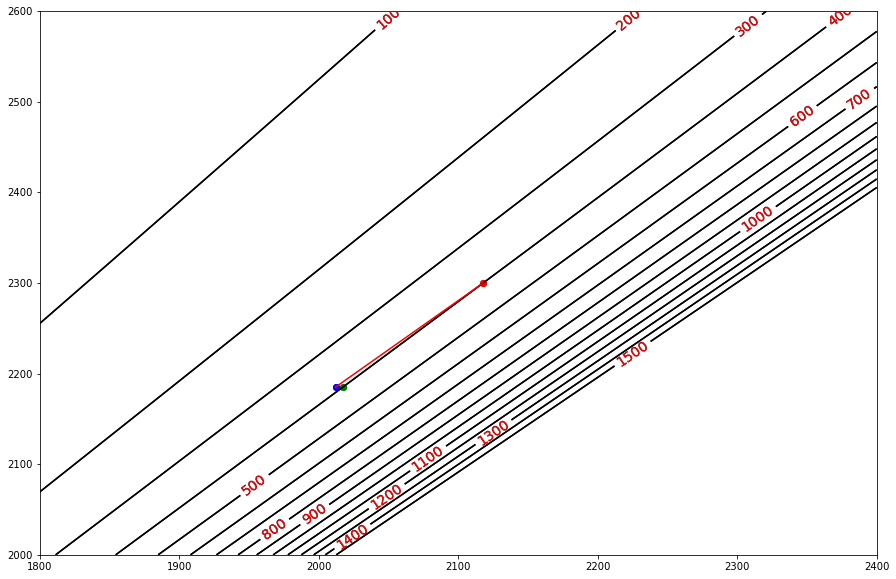

In [283]:


plt.figure(figsize=[15,10])

vmin = 50
vmax=1000,
CS = plt.contour(linear_dic,linear_alk,carbchem_out['pCO2out'].reshape(size, size),vmin=vmin,vmax=vmax,levels = np.linspace(100,1500,15),colors='k')
plt.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

# starting_alk_aim = 2300
# starting_alk_aim = np.where(linear_alk > starting_alk_aim)[0][0]
# starting_dic = 2100
starting_alk_aim = 2300.0
starting_co2_aim = 400.0
alk_loc = np.where(linear_alk > starting_alk_aim)[0][0]
starting_alk = linear_alk[alk_loc]
dic_loc = np.where(carbchem_out['pCO2out'].reshape(size, size)[alk_loc,:] > starting_co2_aim)[0][0]
starting_dic = linear_dic[dic_loc]
starting_co2 = carbchem_out['pCO2out'].reshape(size, size)[alk_loc,dic_loc]
fraction = 0.95
plt.plot([starting_dic,starting_dic*fraction],[starting_alk,starting_alk*fraction],'r')
plt.scatter([starting_dic,starting_dic],[starting_alk,starting_alk],color='r')
plt.scatter([starting_dic*fraction,starting_dic*fraction],[starting_alk*fraction,starting_alk*fraction],color='b')

alk_loc2 = np.where(linear_alk > starting_alk_aim*fraction)[0][0]
dilution_dic = starting_dic*fraction
dic_loc2 = np.where(carbchem_out['pCO2out'].reshape(size, size)[alk_loc2,:] > starting_co2_aim)[0][0]
ending_dic = linear_dic[dic_loc2]

plt.scatter([ending_dic,ending_dic],[starting_alk*fraction,starting_alk*fraction],color='g')

print('DIC taken up = ' + str(dilution_dic - ending_dic))
print('DIC taken up as % of dilution change = ' + str(100.0 * (dilution_dic - ending_dic)/(starting_dic - dilution_dic)))

# plt.colorbar()

In [273]:
linear_dic

array([1800.        , 1800.120024  , 1800.24004801, ..., 2399.75995199,
       2399.879976  , 2400.        ])

In [215]:
starting_co2 = carbchem_out['pCO2out'].reshape(size, size)[alk_loc,dic_loc]
print(starting_co2)

400.0242769343788


<ipython-input-302-5a0aa2253145>:5: UserWarning: The following kwargs were not used by contour: 'lw', 'label'
  CS = plt.contour(linear_dic,linear_alk,carbchem_out['pCO2out'].reshape(size, size),vmin=vmin,vmax=vmax,levels = np.linspace(100,1500,15),colors='k',alpha=0.5,lw=2,label = 'pCO2')
<ipython-input-302-5a0aa2253145>:8: UserWarning: The following kwargs were not used by contour: 'lw', 'label'
  CS2 = plt.contour(linear_dic,linear_alk,carbchem_out['OmegaARout'].reshape(size, size),vmin=vmin,vmax=vmax,levels = np.linspace(0.0,5.0,15),colors='r',alpha=0.5,lw=2,label = 'Arag. sat. state')
No handles with labels found to put in legend.


DIC taken up = -5.317063412682728
DIC taken up as % of dilution change = -5.0209679247423304


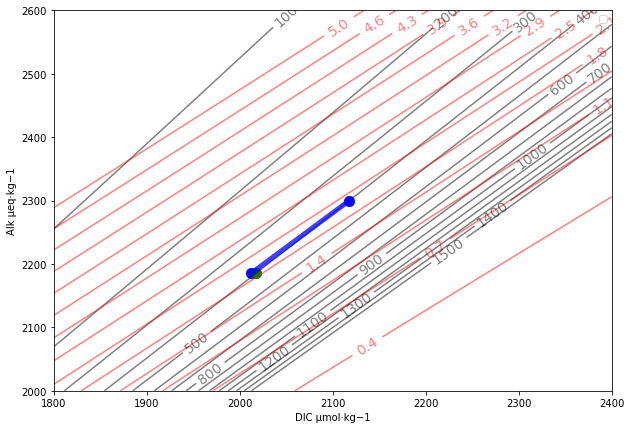

In [302]:
plt.figure(figsize=[10,7])

vmin = 50
vmax=1000
CS = plt.contour(linear_dic,linear_alk,carbchem_out['pCO2out'].reshape(size, size),vmin=vmin,vmax=vmax,levels = np.linspace(100,1500,15),colors='k',alpha=0.5,lw=2,label = 'pCO2')
plt.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

CS2 = plt.contour(linear_dic,linear_alk,carbchem_out['OmegaARout'].reshape(size, size),vmin=vmin,vmax=vmax,levels = np.linspace(0.0,5.0,15),colors='r',alpha=0.5,lw=2,label = 'Arag. sat. state')
plt.clabel(CS2, fmt = '%2.1f', colors = 'r', fontsize=14) #contour line labels

# CS = plt.contour(linear_dic,linear_alk,carbchem_out['OmegaCAout'].reshape(size, size),vmin=vmin,vmax=vmax,levels = np.linspace(0.0,5.0,15),colors='b',alpha=0.5,lw=2)
# plt.clabel(CS, fmt = '%2.1f', colors = 'b', fontsize=14) #contour line labels


# starting_alk_aim = 2300
# starting_alk_aim = np.where(linear_alk > starting_alk_aim)[0][0]
# starting_dic = 2100
starting_alk_aim = 2300.0
starting_co2_aim = 400.0
alk_loc = np.where(linear_alk > starting_alk_aim)[0][0]
starting_alk = linear_alk[alk_loc]
dic_loc = np.where(carbchem_out['pCO2out'].reshape(size, size)[alk_loc,:] > starting_co2_aim)[0][0]
starting_dic = linear_dic[dic_loc]
starting_co2 = carbchem_out['pCO2out'].reshape(size, size)[alk_loc,dic_loc]
fraction = 0.95
plt.plot([starting_dic,starting_dic*fraction],[starting_alk,starting_alk*fraction],'b',lw=5,alpha=0.75)
plt.scatter([starting_dic,starting_dic],[starting_alk,starting_alk],color='b',lw=5,alpha=0.75)
plt.scatter([starting_dic*fraction,starting_dic*fraction],[starting_alk*fraction,starting_alk*fraction],color='b',lw=5,alpha=0.75)

alk_loc2 = np.where(linear_alk > starting_alk_aim*fraction)[0][0]
dilution_dic = starting_dic*fraction
dic_loc2 = np.where(carbchem_out['pCO2out'].reshape(size, size)[alk_loc2,:] > starting_co2_aim)[0][0]
ending_dic = linear_dic[dic_loc2]

plt.scatter([ending_dic,ending_dic],[starting_alk*fraction,starting_alk*fraction],color='g',lw=5,alpha=0.75)

plt.xlabel('DIC μmol·kg−1')
plt.ylabel('Alk μeq·kg−1')
plt.legend()

print('DIC taken up = ' + str(dilution_dic - ending_dic))
print('DIC taken up as % of dilution change = ' + str(100.0 * (dilution_dic - ending_dic)/(starting_dic - dilution_dic)))

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/figures/one_to_one_dilution.png')

